In [1]:
# Analyze for different sensors in K-State testbeds

In [11]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact


In [7]:
df = pd.read_csv(f'../data/Kansas State University/CR300-10553_Table_TE525MM.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
list(df.columns[6:])


['TE525MM_Rain_Tot']

In [8]:
def load_sensor_data(sensor):
    
    # Root URL for the repository data
    root = "https://raw.githubusercontent.com/soilwater/mist/main/data/Kansas_State_University"
    site_1 = pd.read_csv(f'{root}/CR300-23667_Table_{sensor}.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
    site_2 = pd.read_csv(f'{root}/CR300-10553_Table_{sensor}.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
    site_3 = pd.read_csv(f'{root}/CR300-23666_Table_{sensor}.dat',skiprows=[0,2,3],parse_dates=[0], na_values="NAN")
    
    # Read units from one of the sites
    units = pd.read_csv(f'{root}/CR300-23667_Table_{sensor}.dat', skiprows=1, nrows=1, na_values="NAN").iloc[0].values
    
    skip_cols = 6
    variables = list(site_1.columns[skip_cols:])
    N = len(variables)
    
    fig, axs = plt.subplots(N, figsize=(15,4*N),squeeze=False)
    
    for k,var in enumerate(variables):
        axs[k,0].set_title(var.upper())
        axs[k,0].plot(site_1['TIMESTAMP'], site_1[var], label='Site 1')
        axs[k,0].plot(site_2['TIMESTAMP'], site_2[var], label='Site 2')
        axs[k,0].plot(site_3['TIMESTAMP'], site_3[var], label='Site 3')
        axs[k,0].set_ylabel(units[k+skip_cols])
        axs[k,0].legend()
        
    return axs


In [9]:
select_sensor = interact(load_sensor_data,
                         sensor=['Batt','Acclima','CS655','DrillDrop','GroPoint','SoilVue','Hydraprobe','Thetaprobe','Teros12','Teros21','TE525MM'])


interactive(children=(Dropdown(description='sensor', options=('Batt', 'Acclima', 'CS655', 'DrillDrop', 'GroPoi…

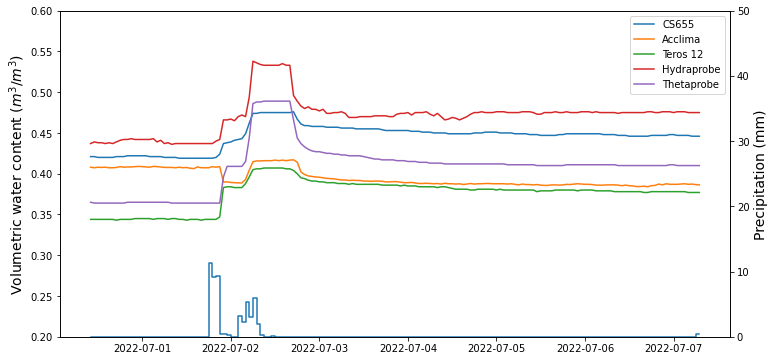

In [9]:
plt.figure(figsize=(12,6))
plt.plot(cs655['TIMESTAMP'], cs655['CS655_VWC_20_Avg'], label='CS655')
plt.plot(acclima['TIMESTAMP'], acclima['Acclima_VWC_20_Avg']/100, label='Acclima')
plt.plot(teros12['TIMESTAMP'], teros12['Teros12_VWC_20_Avg'], label='Teros 12')
plt.plot(hydraprobe['TIMESTAMP'], hydraprobe['Hydraprobe_VWC_20_Avg'], label='Hydraprobe')
plt.plot(thetaprobe['TIMESTAMP'], thetaprobe['Thetaprobe_VWC_20_Avg'], label='Thetaprobe')
plt.ylabel('Volumetric water content ($m^3/m^3$)', size=14)
plt.ylim([0.2,0.6])
plt.legend()

plt.twinx()
plt.step(te525['TIMESTAMP'], te525['TE525MM_Rain_Tot'])
plt.ylim([0, 50])
plt.ylabel('Precipitation (mm)', size=14)

plt.show()

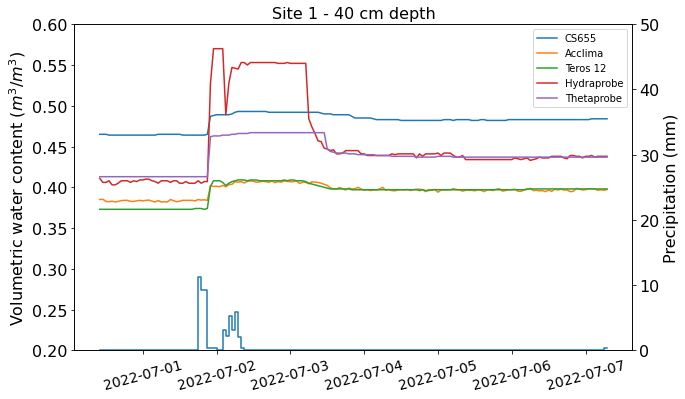

In [27]:
plt.figure(figsize=(10,6))
plt.plot(cs655['TIMESTAMP'], cs655['CS655_VWC_40_Avg'], label='CS655')
plt.plot(acclima['TIMESTAMP'], acclima['Acclima_VWC_40_Avg']/100, label='Acclima')
plt.plot(teros12['TIMESTAMP'], teros12['Teros12_VWC_40_Avg'], label='Teros 12')
plt.plot(hydraprobe['TIMESTAMP'], hydraprobe['Hydraprobe_VWC_40_Avg'], label='Hydraprobe')
plt.plot(thetaprobe['TIMESTAMP'], thetaprobe['Thetaprobe_VWC_40_Avg'], label='Thetaprobe')
plt.ylabel('Volumetric water content ($m^3/m^3$)', size=16)
plt.ylim([0.2,0.6])
plt.legend()
plt.xticks(size=14, rotation=15)
plt.yticks(size=16)

plt.twinx()
plt.step(te525['TIMESTAMP'], te525['TE525MM_Rain_Tot'])
plt.ylim([0, 50])
plt.ylabel('Precipitation (mm)', size=16)
plt.yticks(size=16)

plt.title('Site 1 - 40 cm depth', size=16)
plt.savefig('40_cm.png',dpi=300)
plt.show()


In [29]:
import numpy as np

In [ ]:
np.pi*